In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import plot_decision_regions

import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam

In [ ]:
from sklearn.datasets import make_moons
X, y = make_moons(100, noise=0.25, random_state=2)

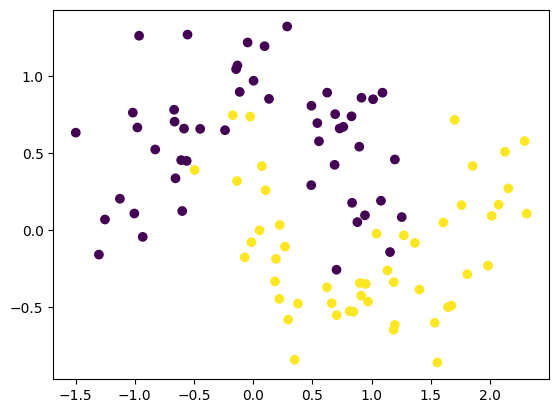

In [ ]:
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

In [ ]:
model1 = Sequential()
model1.add(Dense(128, input_dim=2, activation='relu'))
model1.add(Dense(128, activation='relu'))
model1.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,025 (66.50 KB)

 Trainable params: 17,025 (66.50 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
adam = Adam(learning_rate=0.01)
model1.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

history1 = model1.fit(X, y, epochs=2000, validation_split = 0.2, verbose=1)

Epoch 1/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 563ms/step - accuracy: 0.6906 - loss: 0.6203 - val_accuracy: 0.9000 - val_loss: 0.3640
Epoch 2/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - accuracy: 0.8203 - loss: 0.4069 - val_accuracy: 0.9000 - val_loss: 0.2118
Epoch 3/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.8289 - loss: 0.4001 - val_accuracy: 0.9000 - val_loss: 0.2199
Epoch 4/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.8508 - loss: 0.3838 - val_accuracy: 0.9000 - val_loss: 0.2793
Epoch 5/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.8742 - loss: 0.3267 - val_accuracy: 0.9000 - val_loss: 0.2684
Epoch 6/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.8430 - loss: 0.3349 - val_accuracy: 0.8500 - val_loss: 0.2178
Epoch 7/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.8422 - loss: 0.3376 - val_accuracy: 0.9000 - val_loss: 0.2079
Epoch 8/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 207ms/step - accuracy: 0.8641 - loss: 0.3206 - val_accuracy: 0.9000 -

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step


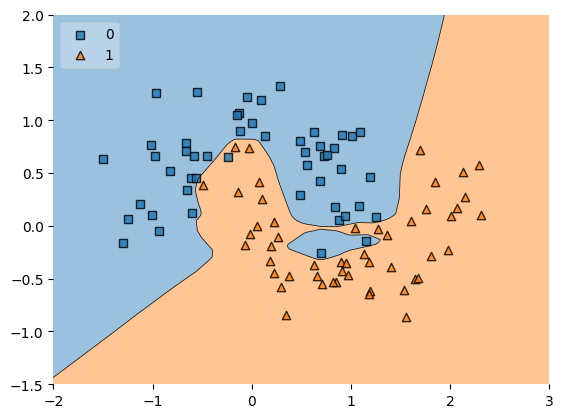

In [ ]:
plot_decision_regions(X, y.astype('int'), clf=model1, legend=2)
plt.xlim(-2,3)
plt.ylim(-1.5,2)
plt.show()

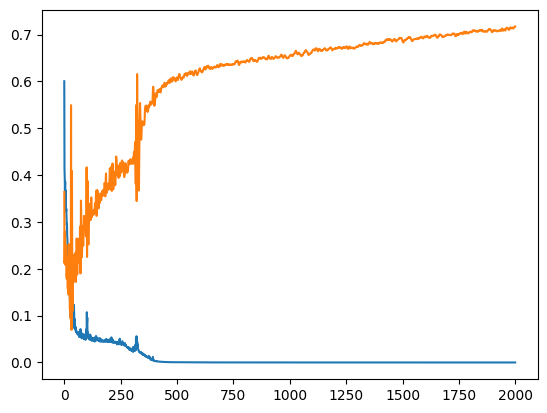

In [ ]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])

In [ ]:
model2 = Sequential()

model2.add(Dense(128, input_dim=2, activation='relu', kernel_regularizer=tensorflow.keras.regularizers.l2(0.03)))
model2.add(Dense(128, activation='relu', kernel_regularizer=tensorflow.keras.regularizers.l2(0.03)))
model2.add(Dense(1, activation='sigmoid'))

model2.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,025 (66.50 KB)

 Trainable params: 17,025 (66.50 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
adam = Adam(learning_rate=0.01)
model2.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

history2 = model2.fit(X, y, epochs=2000, validation_split = 0.2, verbose=0)

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step


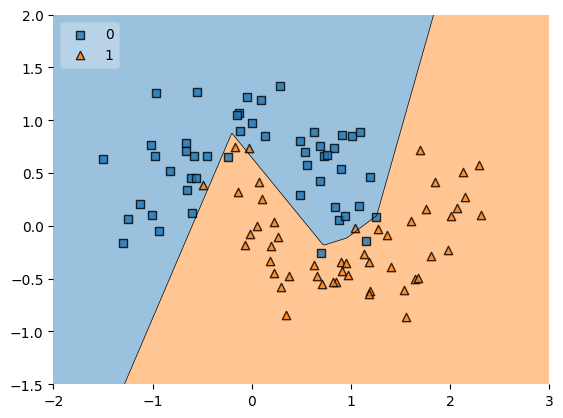

In [ ]:
plot_decision_regions(X, y.astype('int'), clf=model2, legend=2)
plt.xlim(-2,3)
plt.ylim(-1.5,2)
plt.show()

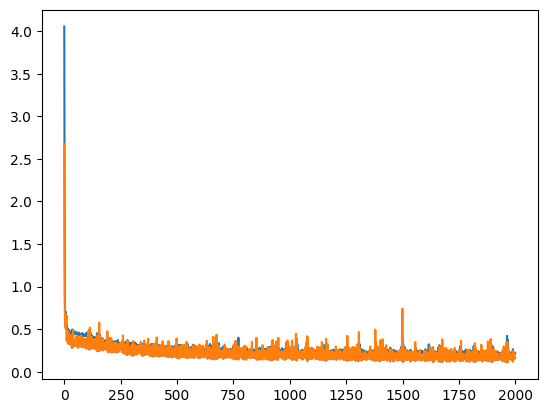

In [ ]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])

In [ ]:
model1.get_weights()[0].shape

(2, 128)

In [ ]:
model1_weight_layer1 = model1.get_weights()[0].reshape(256)
model2_weight_layer1 = model2.get_weights()[0].reshape(256)

print(model1_weight_layer1)
print(model2_weight_layer1)

[-2.99036086e-01 -2.80521005e-01  8.38660728e-03  3.35338444e-01
 -2.67290473e-01  2.26726755e-01 -7.94645548e-02  2.04078883e-01
  3.53526711e-01 -6.92856908e-02 -7.39724338e-02 -2.00565681e-01
 -1.97222307e-01  3.69160652e-01 -1.17953680e-01  6.41874224e-02
 -2.27215305e-01 -2.07531869e-01 -3.01154673e-01 -2.80405074e-01
  2.95525521e-01 -3.35291892e-01 -5.08256912e-01 -4.29140776e-01
  2.87141085e-01 -2.88398921e-01  3.01862836e-01 -3.78071427e-01
  2.98040450e-01  2.71174550e-01  8.55192840e-02 -6.65856227e-02
 -4.61252123e-01  2.98267096e-01 -1.06671967e-01  4.12436336e-01
 -4.08010781e-01  3.18076104e-01 -3.59985322e-01  3.26698810e-01
 -3.89252782e-01  2.27829829e-01 -2.91894019e-01 -4.38774407e-01
 -2.09400177e-01 -3.79398376e-01  3.05053383e-01  3.17387432e-01
 -2.44612619e-01 -3.16880912e-01 -3.68708283e-01 -3.15744758e-01
 -2.07703978e-01 -4.09601778e-01  1.21621825e-01  3.77134442e-01
 -4.67482692e-04  9.04228762e-02 -2.11668834e-01  3.92764688e-01
  2.94132203e-01 -3.51817

<Axes: >

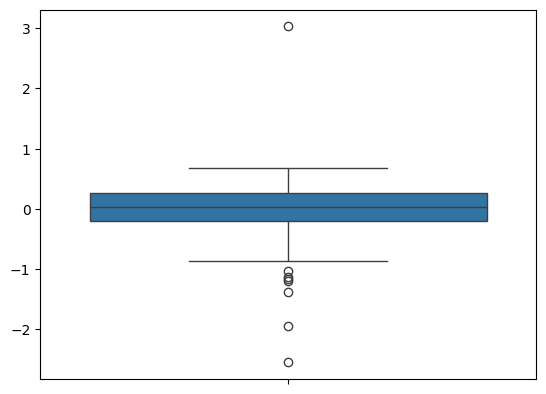

In [ ]:
sns.boxplot(model1_weight_layer1)

<Axes: >

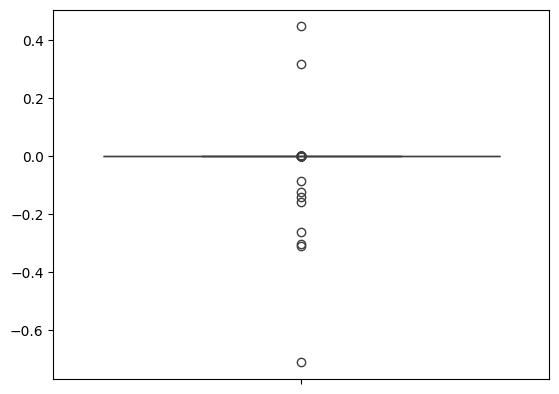

In [ ]:
sns.boxplot(model2_weight_layer1)

In [ ]:
model1_weight_layer1.min()

np.float32(-2.5516346)

In [ ]:
model1_weight_layer1.max()

np.float32(3.0302682)

/tmp/ipython-input-2224180084.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(model1_weight_layer1)
/tmp/ipython-input-2224180084.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(model2_weight_layer1)


<Axes: ylabel='Density'>

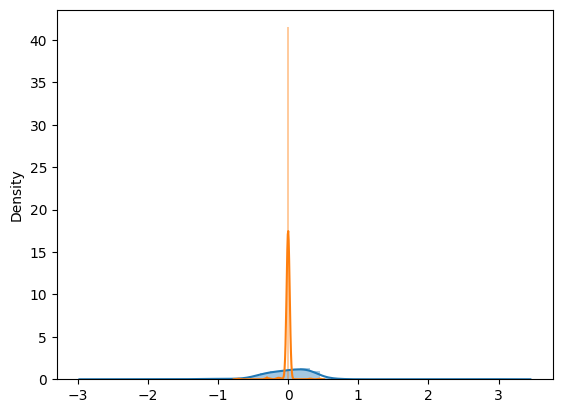

In [ ]:
sns.distplot(model1_weight_layer1)
sns.distplot(model2_weight_layer1)